# UUV Multi-Agent Environment

## Creating the environment

In [1]:
# initialize setup
from fimdpenv import setup, UUVEnv
setup()

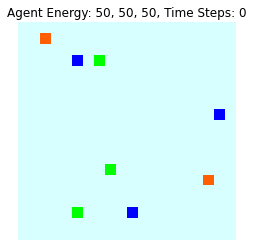

In [2]:
# create envionment
from fimdpenv.UUVEnv import SynchronousMultiAgentEnv
env = SynchronousMultiAgentEnv(num_agents=3, grid_size=[20,20], capacities=[50,50,50], reloads=[22,297], targets=[67, 345, 268], init_states=[350, 178, 65], enhanced_actionspace=0)
env

In [3]:
# get consmdp
mdp, targets = env.get_consmdp()

In [4]:
# allocate targets
allocation_list = [[67], [268], [345]]
env.allocate_targets(allocation_list)
env.targets_alloc

[[67], [268], [345]]

In [5]:
# list reload states
env.reloads

[22, 297]

## Creating and visualizing strategies

In [6]:
# generate strategies
from fimdp.objectives import BUCHI
from fimdp.energy_solvers import GoalLeaningES
from fimdp.core import CounterStrategy

for agent in env.agents:
    solver = GoalLeaningES(mdp, env.capacities[agent], env.targets_alloc[agent], threshold=0.1)
    selector = solver.get_selector(BUCHI)
    strategy = CounterStrategy(env.consmdp, selector, env.capacities[agent], env.energies[agent], init_state=env.init_states[agent])
    env.update_strategy(strategy, agent)

In [7]:
env.strategies

In [8]:
# alternative quick syntax
env.create_counterstrategies()

In [9]:
env.strategies

In [10]:
# animate strategies
env.animate_simulation(num_steps=50, interval=100)

In [11]:
# histories
#env.state_histories
#env.action_histories
env.target_histories

[[67], [268], []]

## Resetting strategies and single transition

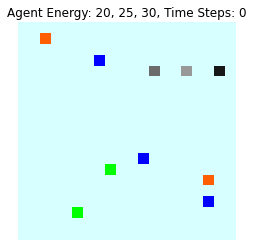

In [12]:
env.reset(init_states=[92,95,98], reset_energies=[20,25,30])
env

In [13]:
env.reloads

[22, 297]

In [14]:
env.targets_alloc

[[67], [268], [345]]

In [15]:
env.strategies

In [16]:
env.state_histories

[[92], [95], [98]]

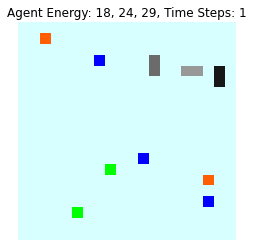

In [17]:
env.step()
env

In [18]:
env.state_histories

[[92, 72], [95, 96], [98, 118]]

## Enhanced action space

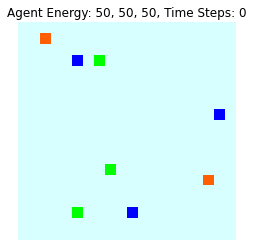

In [19]:
# create envionment with enchanced action space
from fimdpenv.UUVEnv import SynchronousMultiAgentEnv
env2 = SynchronousMultiAgentEnv(num_agents=3, grid_size=[20,20], capacities=[50,50,50], reloads=[22,297], targets=[67, 345, 268], init_states=[350, 178, 65], enhanced_actionspace=1)

# allocate targets
allocation_list = [[67], [268], [345]]
env2.allocate_targets(allocation_list)

env2

In [20]:
# create strategies 
from fimdp.objectives import BUCHI
from fimdp.energy_solvers import GoalLeaningES
from fimdp.core import CounterStrategy

mdp, targets = env2.get_consmdp()

for agent in env2.agents:
    solver = GoalLeaningES(mdp, env2.capacities[agent], env2.targets_alloc[agent], threshold=0.1)
    selector = solver.get_selector(BUCHI)
    strategy = CounterStrategy(env2.consmdp, selector, env2.capacities[agent], env2.energies[agent], init_state=env2.init_states[agent])
    env2.update_strategy(strategy, agent)

In [21]:
# animate strategies
env2.animate_simulation(num_steps=50, interval=100)